In [2]:
import numpy as np
import data_frame
import models
import importlib
import evaluator as ev
import matplotlib.pyplot as plt

In [3]:
filePath = "../KiDS-DR5-WCScut_x_DESI-DR1-small.fits"
df = data_frame.DataFrame(filePath, "QSO", data_frame.MaxFiller())

In [4]:
df.data.loc[df.data["faint"], "MAG_GAAP_r"].max()

np.float32(25.945515)

In [9]:
importlib.reload(models)

model = models.MLModelContext(strategy=models.ANNDoubleGauss(df))
model.train()
model.test_predict()

Epoch 67: early stopping
Restoring model weights from the end of the best epoch: 37.


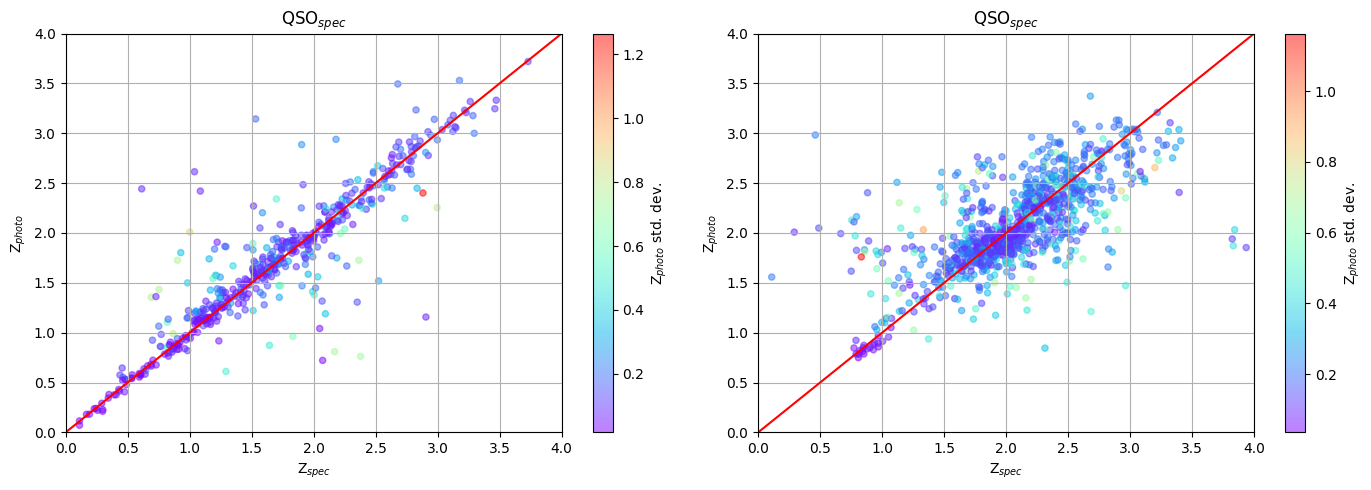

,MSE,R^2,Redshift error
test,0.098938,0.823464,"(0.01089469254477867, 0.13181723210448734)"
faint,0.214891,0.370492,"(0.008663464974649978, 0.16606131667665522)"


In [10]:
importlib.reload(ev)
evaluator = ev.Evaluator(df)
evaluator.redshift_std()
evaluator.evaluate_metrics()

2.3108397
2.4595034338380697


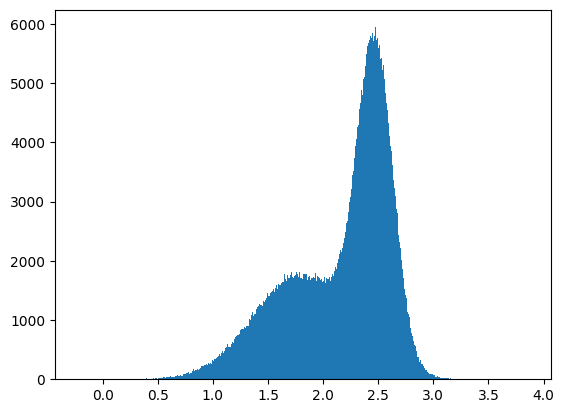

In [82]:
X_test = model.strategy.X_test
y_test = model.strategy.y_test
raw_model = model.strategy.network

# x=7357 Large redshift
x = 3
y_model = raw_model(X_test[x:x+1])
y_sample = y_model.sample(1000000).numpy().reshape(-1)
print(np.median(y_sample))
print(y_test.values[x])
plt.hist(y_sample, bins=1000)
# plt.xlim(1.2,1.8)
plt.show()

In [63]:
df.data[df.data["Z_pred"] == df.data["Z_pred"].max()]

,ID,RAJ2000,DECJ2000,MAG_GAAP_u,MAGERR_GAAP_u,MAG_GAAP_g,MAGERR_GAAP_g,MAG_GAAP_r,MAGERR_GAAP_r,MAG_GAAP_i1,...,Z-H,Z-Ks,Y-J,Y-H,Y-Ks,J-H,J-Ks,H-Ks,Z_pred,Z_pred_std
622316,b'KiDSDR5 J111545.840-002424.26 ',168.941003,-0.406739,25.789057,1.515801,26.11517,2.765205,23.2437,0.062101,21.66424,...,0.411819,0.482119,0.071798,0.278358,0.348658,0.20656,0.276859,0.070299,5.168223,0.33335


In [78]:
y_test[7357:7370]

622316    4.923656
622357    1.265930
622444    2.421249
622482    2.210992
622515    2.192188
622527    1.272054
622596    0.871018
622609    2.579065
622658    1.180521
622711    2.533354
622720    1.211646
622760    2.501076
622811    1.989476
Name: Z, dtype: float64